<a href="https://colab.research.google.com/github/MarcioSilva34/Data_science/blob/master/Via_varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://www.infomoney.com.br/wp-content/uploads/2019/11/20190927111721_1200_675_-_via_varejo-e1573748233253.jpg?w=768&quality=75&strip=all)

Via Varejo S.A. (B3: VVAR3) é uma empresa de comércio varejista brasileira fundada em 2010, responsável pelas redes de lojas das bandeiras Casas Bahia e Pontofrio e das suas respectivas lojas virtuais, da fabricante de móveis Bartira, além de ser a administradora do site de e-commerce Extra.com.br.

A criação da companhia ocorreu após a associação da Casas Bahia, pertencente à família Klein, e do Pontofrio, propriedade do Grupo Pão de Açúcar (GPA),[3] que até junho de 2019 foi seu acionista controlador através da participação de 39,36% no seu capital.[4] A partir de 14 de junho de 2019, o GPA deixa o controle da Via Varejo, Michel Klein volta presidente do Conselho de Administração e o acionista de referência da companhia, durante leilão de venda das ações. Uma nova diretoria executiva foi anunciada, com Roberto Fulcherberguer assumindo a presidência. Em 2018, a receita bruta da Via Varejo alcançou a marca de R$ 30,5 bilhões.

A empresa está presente em mais de 400 municípios brasileiros, 20 estados e no Distrito Federal, com cerca de 1 mil lojas e aproximadamente 45 mil colaboradores. A sede administrativa da companhia se situa no município de São Caetano do Sul, na Grande São Paulo (SP), e posiciona-se como uma das maiores varejistas de eletroeletrônicos do mundo.

# **Instalando o YFinance para captura das cotações** 
## Para consultar a lista de ativos no link
### https://br.financas.yahoo.com/industries/Industrias-em-geralIndustries/



In [0]:
!pip install yfinance --upgrade --no-cache-dir -q

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set
import matplotlib.pyplot as plt
import pandas_datareader.data as web




# **Importando do YFinance** 



In [0]:
import yfinance as yf
yf.pdr_override()


># **Baixando as cotações do Yahoo Finance para o Via Varejo** 'VVAR3.SA'




In [133]:
VVAR3 = web.get_data_yahoo('VVAR3.SA')

[*********************100%***********************]  1 of 1 completed


# **Dicionário das variáveis**

* `Open` - Preço de abertura
* `High` - Preço máximo
* `Low` - Preço mínimo
* `Close` - Preço de fechamento
* `Adj Close` - Preço de fechamento ajustado
* `Volume` - Volume negociado de ações




#**Verificando as condições do nosso *dataset*, analisando as 5 primeiras entradas para o bom entendimento.**

In [134]:
# mostrar as 5 primeiras entradas
VVAR3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1.08158,1.08158,1.08158,1.08158,0.866204,6990
2000-01-04,1.08158,1.08158,1.08158,1.08158,0.866204,16309
2000-01-05,1.08158,1.08158,1.08158,1.08158,0.866204,16309
2000-01-06,1.08158,1.08158,1.08158,1.08158,0.866204,100963
2000-01-07,1.08158,1.08158,1.08158,1.08158,0.866204,777


# **1 - Identificando o volume de dados do DataFrame**
## **2 - Verificando as 5 primeiras entradas do dataset**


In [135]:
print("Entradas:\t {}".format(VVAR3.shape[0]))
print("Variáveis:\t {}\n".format(VVAR3.shape[1]))


display(VVAR3.dtypes)

Entradas:	 4920
Variáveis:	 6



Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# ***Plotando o grafico para entender as movimentaçoes do ativo.***
* Incluindo médias para entender a volatividade, e descolamento do preço.

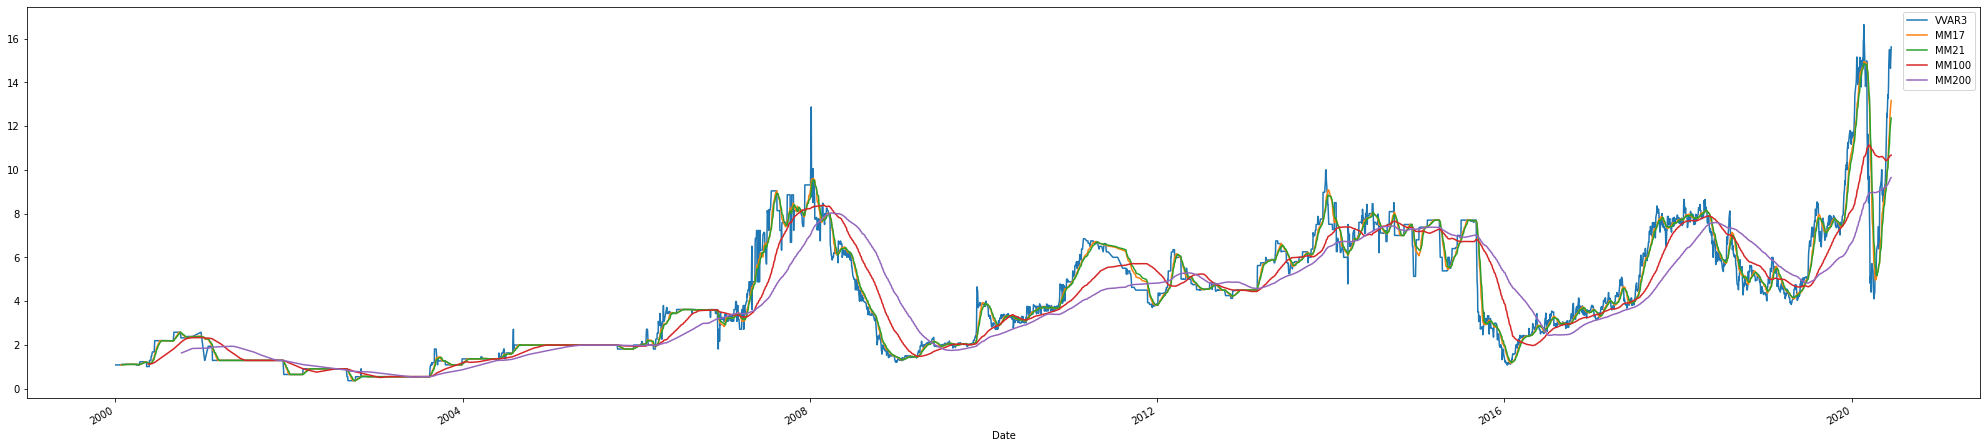

In [136]:
VVAR3["Close"].plot(figsize=(35,8), label="VVAR3")
VVAR3["Close"].rolling(17).mean().plot(label="MM17")
VVAR3["Close"].rolling(21).mean().plot(label="MM21")
VVAR3["Close"].rolling(100).mean().plot(label="MM100")
VVAR3["Close"].rolling(200).mean().plot(label="MM200")
plt.legend();

#### **Olhando o preço atual 14,95 podemos observar que as médias longas estão descoladass do preço de face, podendo sinalizar um retorno a média proximo de 35%, para uma cotação de R$ 11,00.**




# **Consiramos os dados para os pregões de 2018,2019 e 2020**
* Período que a empresa entrou no radar  de casas de recomendações de investimentos.
* Período de crise e especulações envolvendo os sócios
* Crescente volume de negociações 



In [137]:
VVAR3.tail(602)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-03,7.96,7.97,7.72,7.75,7.738552,9700
2018-01-04,7.91,7.91,7.75,7.81,7.798464,10700
2018-01-05,7.88,7.88,7.51,7.56,7.548833,10000
2018-01-08,7.78,7.78,7.58,7.69,7.678641,3400
2018-01-09,7.77,7.78,7.73,7.73,7.718582,1000
...,...,...,...,...,...,...
2020-06-08,15.30,15.53,14.93,15.50,15.500000,83947300
2020-06-09,15.11,15.44,14.85,14.97,14.970000,72709600
2020-06-10,15.27,15.72,14.83,14.95,14.950000,92995000


#### **Empresa apresentou forte valorização para o período para o ciclo consultado**
* Valorização tota 90%
* Média ano : 39,3%
* Média mês : 1,8 %


# **Validando qualidade do Dataset**

In [138]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(VVAR3.isnull().sum() / VVAR3.shape[0]).sort_values(ascending=False)

Volume       0.0
Adj Close    0.0
Close        0.0
Low          0.0
High         0.0
Open         0.0
dtype: float64

#### **Dados de qualidade, não possui dados faltantes que podem impactar nossa capacidade de analise**

# **Histograma das variáveis numéricas**


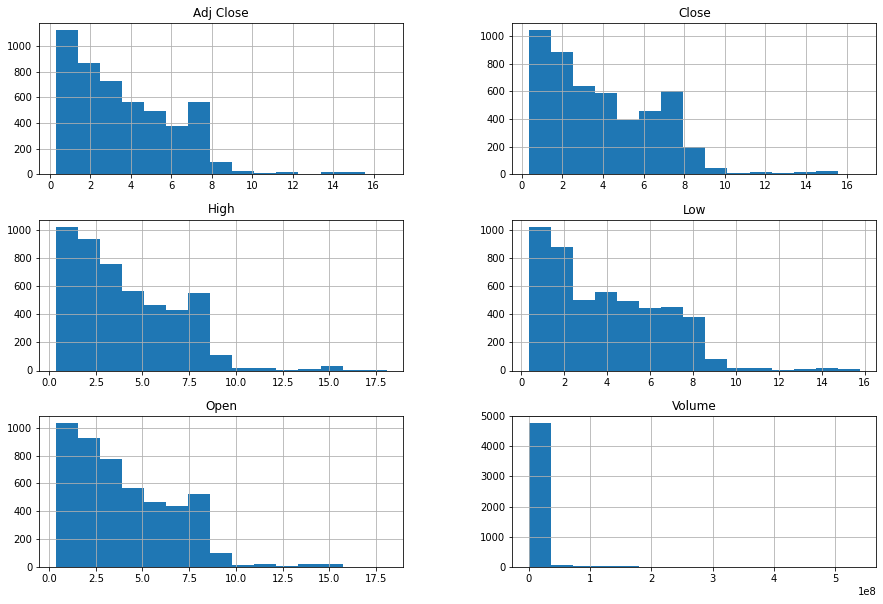

In [139]:
VVAR3.hist(bins=15, figsize=(15,10));

# **Resumo estatístico das variáveis numéricas**







In [140]:
# ver o resumo estatístico das variáveis numéricas
VVAR3[['Open', 'High', 'Low', 'Close',
    'Adj Close',]].describe()

,Open,High,Low,Close,Adj Close
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,4.073911,4.125200,3.977463,4.026198,3.659302
std,2.713141,2.758063,2.653106,2.700845,2.643522
min,0.361510,0.361510,0.361510,0.361510,0.289522
25%,1.988290,1.988290,1.900000,1.925000,1.592360
50%,3.609640,3.615070,3.540000,3.596990,3.049634
75%,6.088125,6.225000,6.000000,6.000000,5.412451
max,18.075300,18.075300,15.770000,16.639999,16.639999


# **BOXPLOT para avaliação do preço, sempre considerando seu fechamento**
* Box 1 > Utilizamos como metrica valores acima do desvio padrão de 2.69
* Box 2 > Utilizamos como metrica valores acima da média de 3.59
* Box 3 > Utilizamos como metrica valores acima do terceiro quartil média de 6.0

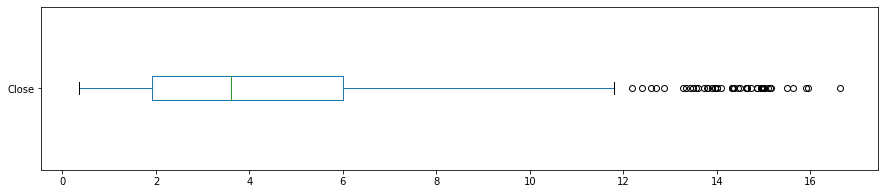


Close: valores acima de 2.70
2955 entradas
60.0610%


In [141]:
# Close
VVAR3.Close.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 2.70 para price
print("\nClose: valores acima de 2.70")
print("{} entradas".format(len(VVAR3[VVAR3.Close > 2.70])))
print("{:.4f}%".format((len(VVAR3[VVAR3.Close > 2.70]) / VVAR3.shape[0])*100))

# df.Close.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

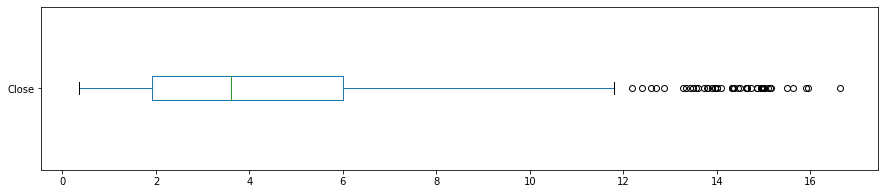


Close: valores acima de 3.59
2468 entradas
50.1626%


In [142]:
# Close
VVAR3.Close.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 3.59 para price
print("\nClose: valores acima de 3.59")
print("{} entradas".format(len(VVAR3[VVAR3.Close > 3.59])))
print("{:.4f}%".format((len(VVAR3[VVAR3.Close > 3.59]) / VVAR3.shape[0])*100))

# df.Close.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));


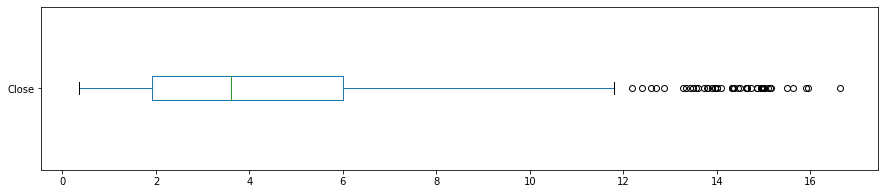


Close: valores acima de 6.0
1221 entradas
24.8171%


In [143]:
# Close
VVAR3.Close.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 6.0 para price
print("\nClose: valores acima de 6.0")
print("{} entradas".format(len(VVAR3[VVAR3.Close > 6.0])))
print("{:.4f}%".format((len(VVAR3[VVAR3.Close > 6.0]) / VVAR3.shape[0])*100))

# df.Close.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

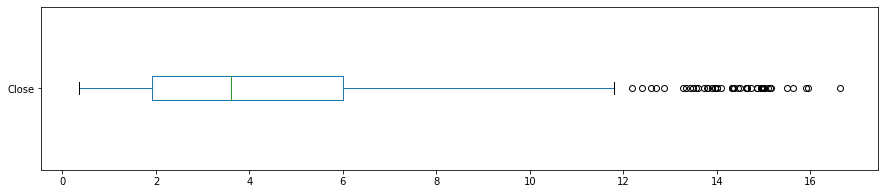


Close: valores acima de 14.62
23 entradas
0.0610%


In [144]:
# Close
VVAR3.Close.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 15.62 para price
print("\nClose: valores acima de 14.62")
print("{} entradas".format(len(VVAR3[VVAR3.Close > 14.62])))
print("{:.4f}%".format((len(VVAR3[VVAR3.Close > 15.62]) / VVAR3.shape[0])*100))

# df.Close.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

# **FLUXO E PREÇO DO ATIVO CONSIDERANDO A COTAÇÃO LIMITE DE 10.00**
* Utilizamos o valor de 10.00 por considerar o limite maximo do 3 quartil
* Considerandos a cotação de 10.00, é posivel notar que poucas vezez o ativo transitou proximo ao limite do terceiro quartil, seu maior volume de negociação ou " proteção" gira em torno dos 4.0 até o limite de 7.0.

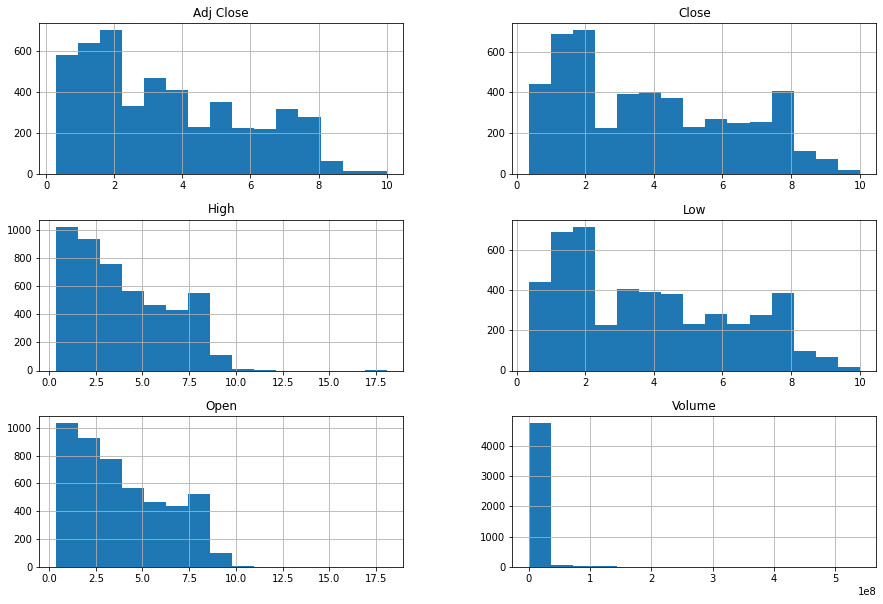

In [145]:

# remover os *outliers* em um novo DataFrame
VVAR3_clean = VVAR3.copy()
VVAR3_clean.drop(VVAR3_clean[VVAR3_clean.Close > 10.00].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
VVAR3_clean.hist(bins=15, figsize=(15,10));


# **ENTENDENDO O FLUXO E PREÇO DO ATIVO CONSIDERANDO A COTAÇÃO DE 15.59**
* Considerandos a cotação atual de 15.59, é posivel notar que poucas vezez o ativo foi negociado acima de 15.59 sinalizando claramente uma resistencia forte e redução do volume de negociações .

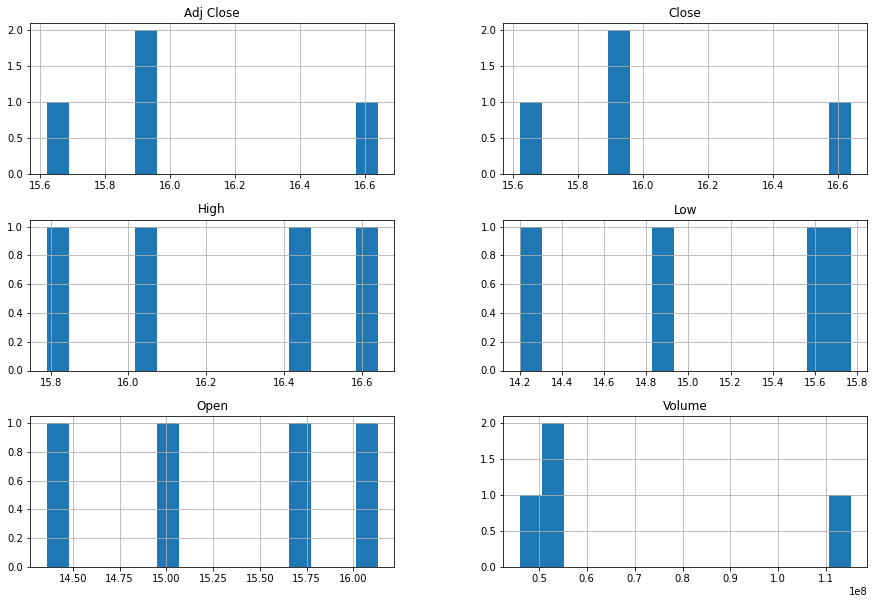

In [146]:

# remover os *outliers* em um novo DataFrame
VVAR3_clean = VVAR3.copy()
VVAR3_clean.drop(VVAR3_clean[VVAR3_clean.Close < 15.59].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
VVAR3_clean.hist(bins=15, figsize=(15,10));


In [147]:
# criar uma matriz de correlação
corr = VVAR3_clean[['Open','High','Low','Close','Adj Close','Volume']].corr()

display(corr)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.899346,0.992216,0.592687,0.592687,-0.869671
High,0.899346,1.000000,0.936116,0.879644,0.879644,-0.788897
Low,0.992216,0.936116,1.000000,0.677983,0.677983,-0.900994
Close,0.592687,0.879644,0.677983,1.000000,1.000000,-0.597990
Adj Close,0.592687,0.879644,0.677983,1.000000,1.000000,-0.597990
Volume,-0.869671,-0.788897,-0.900994,-0.597990,-0.597990,1.000000


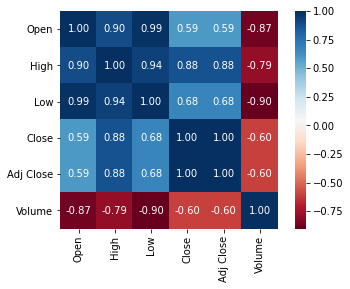

In [148]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# **Conclusão final**.
> **1º** Diante dos numeros apresentado é possivel notar que o ativo VVAR3 sempre que ultrapassa o valor de 6.0 se torna um ativo de baixo retorno financeiro, esta informação se confirma quando o mesmo ultrapassa R$ 10.00, seu volume de negociação cai de forma significativa tornando qualquer " proteção " por parte de grandes Player algo improvavel.

> **2º** Ativo com grande caracteristicas de operação de volatilidade com proteção em 3 niveis detectados. ( 3,6.12) recomendamos compra sempre abaixo de 5 reais com possivel saida ou parcial acima de 8, caso o fluxo acima desses niveis aumente pode se manter o trade em continuidade.

> **3º** Não consideramos em nossa analise noticias ou qualquer elemento que possa alterar o comportamento do ativo de forma abrupta.



> # **Numeros relevantes**.

> Cotação de fechamento acima de: 2.70
2.955 entradas
60.06%

> Cotação de fechamento acima de: 3.59
2468 entradas
50.16 %

> Cotação de fechamento acima de: 6.0
1.221 entradas
24.81%

> Cotação de fechamento acima de: 14.62
0.23 entradas
0.06%

> Quanto maior o preço maior o risco retorno.



#**O conteúdo apresentado não se trata de recomendação, indicação e/ou aconselhamento de investimento, sendo única e exclusiva responsabilidade do investidor a tomada de decisão.**
